In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

%matplotlib inline

df = pd.read_csv('csv_files/cleaned_list.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,company_age,num_competitors,job_tag,job_level,State,Region,Division,Latitude,Longitude
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech\r,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,0,52,0,data scientist,none,Virginia,South,South Atlantic,38.003386,-79.458786
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System\r,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,1,-1,0,data scientist,none,Massachusetts,Northeast,New England,42.062940,-71.718067
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI\r,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,1,28,0,other,none,Ohio,Midwest,East North Central,40.190362,-82.669252
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena\r,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,0,-1,2,other,none,Delaware,South,South Atlantic,39.145251,-75.418921
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet\r,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,0,179,2,data scientist,none,Texas,South,West South Central,31.169336,-100.076842


In [2]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'city', 'state',
       'same_state', 'company_age', 'num_competitors', 'job_tag', 'job_level',
       'State', 'Region', 'Division', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
# interested categories 

cat = ['job_tag', 'job_level', 'state', 'Size', 'Industry', 'Sector', 'Type of ownership', 'Rating', 'Revenue', 'avg_salary', 'same_state', 'Founded', 'company_age', 'num_competitors', 'Region', 'Division']


model_df = df[cat]
print(model_df.shape)
model_df.head()

(299, 16)


,job_tag,job_level,state,Size,Industry,Sector,Type of ownership,Rating,Revenue,avg_salary,same_state,Founded,company_age,num_competitors,Region,Division
0,data scientist,none,VA,5001 to 10000 employees,Research & Development,Business Services,Company - Public,4.2,$1 to $2 billion (USD),93.0,0,1968,52,0,South,South Atlantic
1,data scientist,none,MA,201 to 500 employees,Health Care Services & Hospitals,Health Care,Hospital,3.6,Unknown / Non-Applicable,93.0,1,-1,-1,0,Northeast,New England
2,other,none,OH,201 to 500 employees,Consulting,Business Services,Company - Private,4.6,$50 to $100 million (USD),93.0,1,1992,28,0,Midwest,East North Central
3,other,none,DE,201 to 500 employees,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Private,3.9,$100 to $500 million (USD),93.0,0,-1,-1,2,South,South Atlantic
4,data scientist,none,TX,1001 to 5000 employees,IT Services,Information Technology,Company - Private,3.1,$1 to $2 billion (USD),93.0,0,1841,179,2,South,West South Central


In [5]:
per_missing = (round((model_df.isna().sum()/model_df.shape[0]) * 100,2).to_frame(name = '% of missing values'))

print(per_missing)
for index, row in per_missing.iterrows():
    if row[0] > 50:
#         print('yes')
        model_df.drop(labels=index, inplace=True, axis=1)
    else:
#         pass
        model_df.fillna('Unknown', inplace=True)
    
model_df.isna().sum()

                   % of missing values
job_tag                           0.00
job_level                         0.00
state                             4.35
Size                              0.00
Industry                          0.00
Sector                            0.00
Type of ownership                 0.00
Rating                            0.00
Revenue                           0.00
avg_salary                        0.00
same_state                        0.00
Founded                           0.00
company_age                       0.00
num_competitors                   0.00
Region                            5.02
Division                          5.02


C:\Users\Ekene\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


job_tag              0
job_level            0
state                0
Size                 0
Industry             0
Sector               0
Type of ownership    0
Rating               0
Revenue              0
avg_salary           0
same_state           0
Founded              0
company_age          0
num_competitors      0
Region               0
Division             0
dtype: int64

In [7]:
model_df.Region.unique()

array(['South', 'Northeast', 'Midwest', 'West', 'Unknown'], dtype=object)

In [8]:
# linearregression
# decision tree
# Random Forrest


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error 


In [9]:
# getting dummie variables and spliting dataset

model_df_dum = pd.get_dummies(model_df)
X = model_df_dum.drop('avg_salary', axis = 1)
y = model_df_dum['avg_salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)


In [10]:
# initilize models to be used 
lr = LinearRegression()
ls = Lasso()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

models = [lr, ls, rf, dt]
model_names = ['Linear', 'Lasso', 'Rand.F', 'Dec.T']


ML Model:  LinearRegression() Avg. Cross Val score:  -28.017673545416038 Mean Absolute Error: 30.23276416060733
ML Model:  Lasso(alpha=array([0.44])) Avg. Cross Val score:  -19.424819022742643 Mean Absolute Error: 21.338550431517533
ML Model:  RandomForestRegressor() Avg. Cross Val score:  -20.56863713924964 Mean Absolute Error: 22.25541417989418
ML Model:  DecisionTreeRegressor() Avg. Cross Val score:  -25.05361111111111 Mean Absolute Error: 27.218888888888888


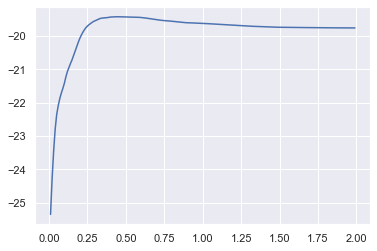

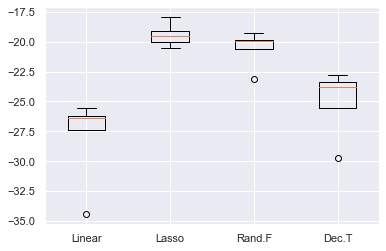

In [12]:
# looping through our models

error_results =[]
model_predictions = []

ls_alpha = []
ls_error = []
for model_name, model in zip(model_names,models):
    if model_name != 'Lasso':
        cv_error = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        error_results.append((cv_error))  # appending to our results the avg score from our cross val

    #     cv_pred = cross_val_predict(model, X_train, y_train, cv=5)
    #     model_predictions.append(cv_pred)

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        model_predictions.append(pred)

        mse = mean_absolute_error(y_test, pred)

        print('ML Model: ', model, 'Avg. Cross Val score: ', cv_error.mean(), 'Mean Absolute Error:', mse)
    elif model_name == 'Lasso':
        # since lasso is based on alpha we have to optimize for that
        for i in range(1,200):
            ls_alpha.append(i/100)
            temp_model = Lasso(alpha=(i/100))
            ls_error.append(np.mean(cross_val_score(temp_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)))
            
        df_error = pd.DataFrame(tuple(zip(ls_alpha,ls_error)), columns=['alpha', 'error'])
        opt_alpha = df_error[df_error.error == max (df_error.error)].alpha.values
        model = Lasso(alpha = opt_alpha)
            
        cv_error = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        error_results.append((cv_error))
            
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        model_predictions.append(pred)

        mse = mean_absolute_error(y_test, pred)
    
        print('ML Model: ', model, 'Avg. Cross Val score: ', cv_error.mean(), 'Mean Absolute Error:', mse)
            
        plt.plot(ls_alpha, ls_error)
    
fig, ax = plt.subplots()
plt.boxplot(error_results)
ax.set_xticklabels(model_names)
plt.show()

In [10]:
# # grid search to optimize parameters
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
# gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
# gs.fit(X_train,y_train)

# gs.best_score_


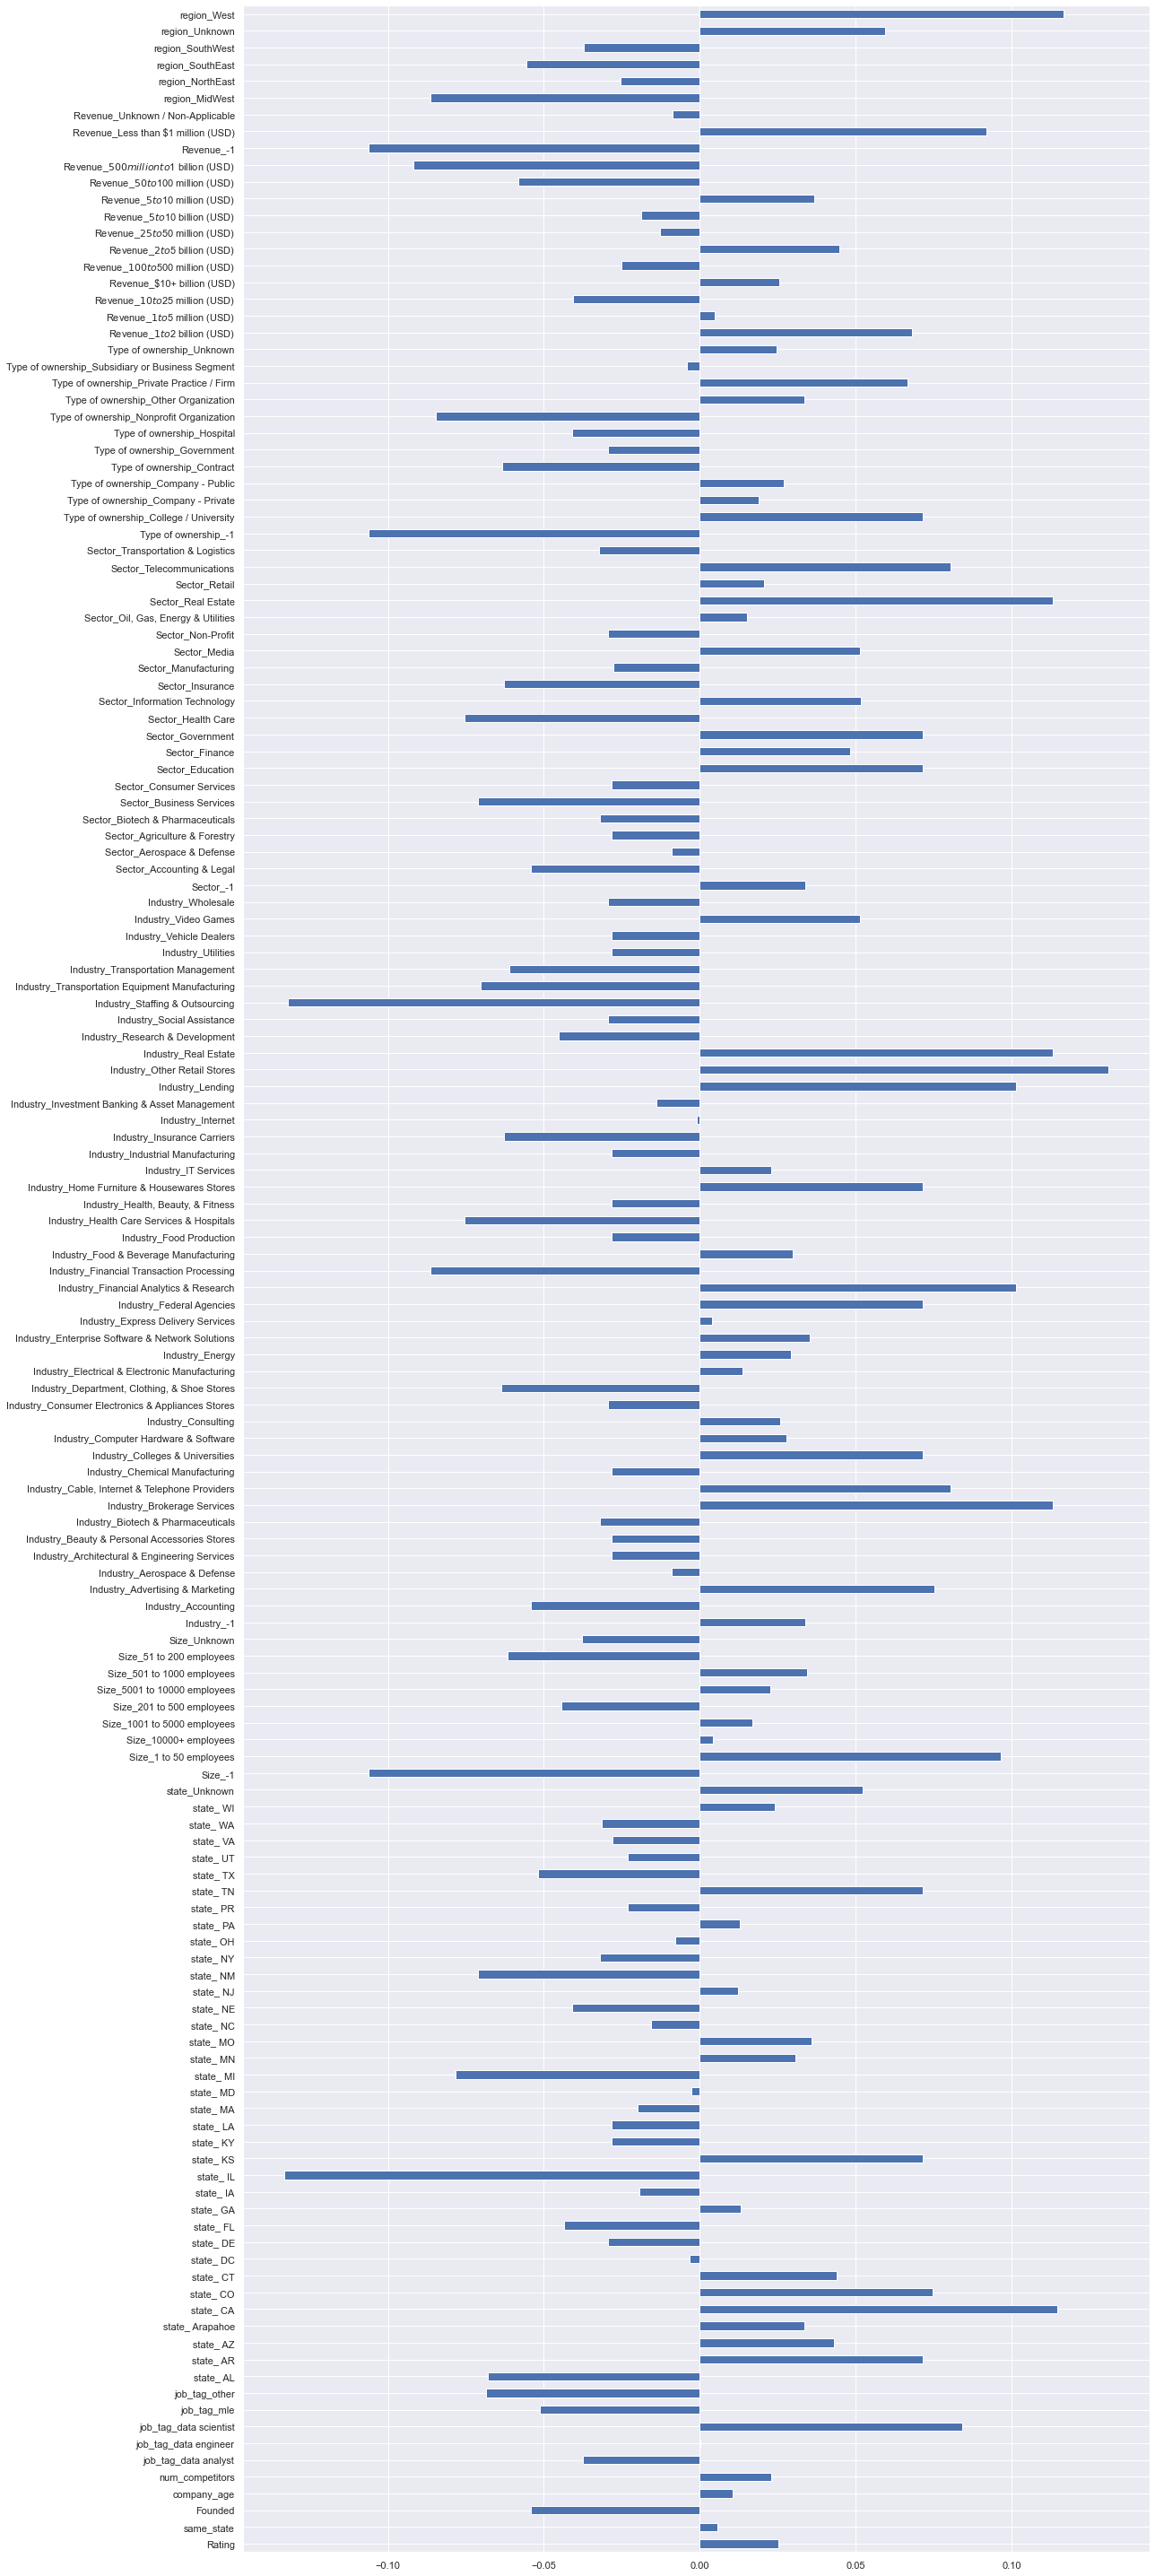

In [11]:
# we can see some of the correlations to average salary based and compare and also look atht the summary statistics from the model 

corr_with = X.corrwith(model_df_dum.avg_salary)  # here were checking correlations of our feature variables with our target y

fig, ax = plt.subplots(figsize=(18,40))
corr_with.plot(kind='barh', ax=ax)
plt.tight_layout()